   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

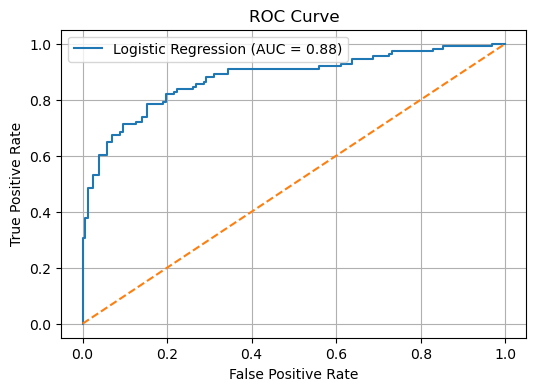

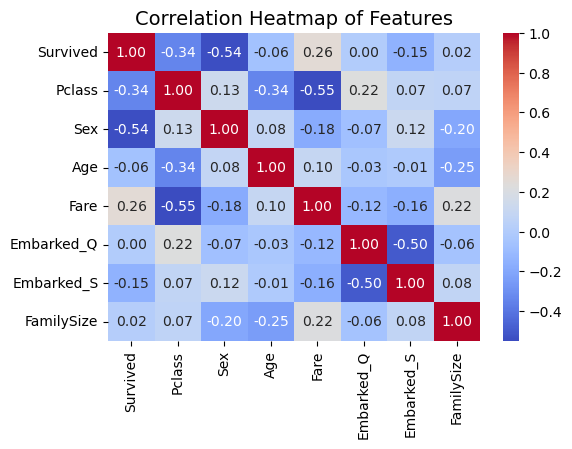

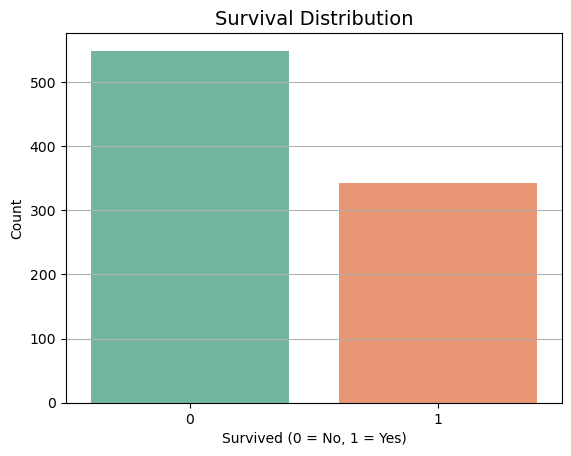

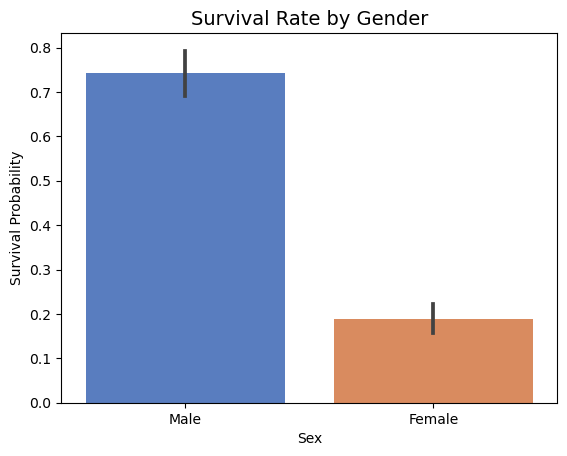

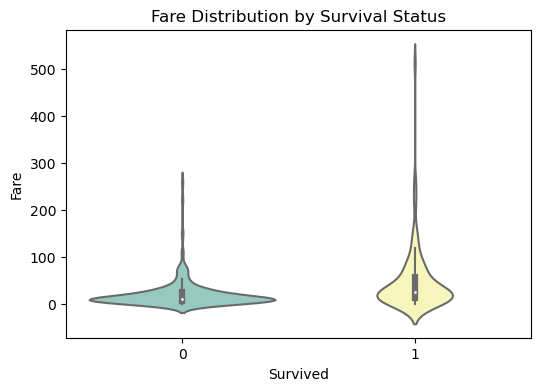

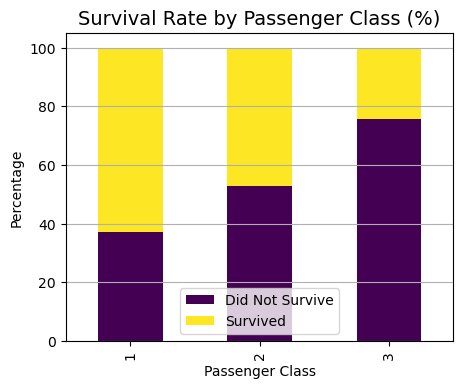

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("titanic.csv")

print(df.head())

print(df.isnull().sum())

# Drop irrelevant features
df.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True)

# Fill missing Age with median, Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print(df.isnull().sum())

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male:0, female:1
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop Parch and SibSp
df.drop(columns=['SibSp', 'Parch'], inplace=True)

df.head()

#Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Survived', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('Survived', axis=1).columns)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

y_probs = best_model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Distribution", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df, palette='muted')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival Rate by Gender", fontsize=14)
plt.ylabel("Survival Probability")
plt.show()

plt.figure(figsize=(6, 4))
sns.violinplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

ct = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(5, 4))
plt.title("Survival Rate by Passenger Class (%)", fontsize=14)
plt.ylabel("Percentage")
plt.xlabel("Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.grid(axis='y')
plt.show()



# ### **1. Data Loading and Exploration**

- The dataset is loaded using `pandas` from a CSV file.
- The first few rows (`head()`) are displayed to understand the data.
- Null values are identified using `isnull().sum()` to plan for data cleaning.

---

### **2. Data Cleaning**

- Irrelevant columns such as **Name**, **PassengerId**, **Cabin**, and **Ticket** are dropped because they do not contribute meaningful information to the model.
- Missing values in the **Age** column are filled with the **median age** to preserve the distribution and reduce bias.
- Missing values in **Embarked** are filled with the **most frequent value (mode)**.

---

### **3. Feature Engineering**

- **Categorical Encoding**:
  - The **Sex** column is label-encoded (male = 0, female = 1).
  - The **Embarked** column is one-hot encoded, converting it into numerical format for the model.
- A new feature **FamilySize** is created by combining `SibSp` (siblings/spouses) and `Parch` (parents/children) to represent the total number of family members aboard.
- After creating FamilySize, **SibSp** and **Parch** are dropped to reduce redundancy.

---

### **4. Feature Scaling**

- All features (except the target variable `Survived`) are scaled using **StandardScaler**, which transforms them to have zero mean and unit variance.
- This is important for models like logistic regression, which are sensitive to feature scale.

---

### **5. Model Building and Training**

- The dataset is split into **training** and **test** sets using `train_test_split()`.
- A **Logistic Regression** model is used to predict survival.
- **GridSearchCV** is used for **hyperparameter tuning**, testing different values of `C` (regularization strength) and `solver` algorithms, using 5-fold cross-validation.
- The best model is selected based on accuracy.

---

### **6. Model Evaluation**

- Predictions are made on the test data.
- Evaluation metrics include:
  - **Confusion Matrix**: Shows true vs. predicted labels.
  - **Classification Report**: Precision, recall, f1-score for each class.
  - **Accuracy Score**: Proportion of correct predictions.
  - **ROC-AUC Score**: Measures model's ability to distinguish between classes.
  - **ROC Curve**: Visual representation of true vs. false positive rate.

---

### **7. Data Visualization and Insights**

Multiple plots are used to gain insights:

- **Correlation Heatmap**: Displays correlations between numerical features.
- **Survival Count Plot**: Shows the distribution of survivors and non-survivors.
- **Bar Plot by Gender**: Highlights survival differences between males and females.
- **Violin Plot by Fare**: Compares fare distributions for survived vs. non-survived.
- **Survival by Class**: Shows survival percentages by passenger class using a stacked bar chart.

